# If you want to follow along:
http://bit.ly/405vW8E

In [ ]:
!pip install flordb

In [1]:
# Download ML Tutorials
!git clone https://github.com/ucbepic/ml_tutorial.git /content/ml_tutorial

Cloning into '/content/ml_tutorial'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 58 (delta 22), reused 43 (delta 13), pack-reused 0
Receiving objects: 100% (58/58), 15.46 KiB | 310.00 KiB/s, done.
Resolving deltas: 100% (22/22), done.


In [2]:
import os
os.chdir('/content/ml_tutorial')

In [ ]:
!git checkout -b flor.shadow

# Let's have a look at `main.py` →

```python
...
Flor.checkpoints(model, optimizer)
for epoch in Flor.loop(range(num_epochs)):
    for i, (images, labels) in Flor.loop(enumerate(train_loader)):
      ...
```


In [ ]:
!cp ../decorated_main.py ./main.py

In [ ]:
!python main.py --flor GoogleDemo

pivot came out of nowhere, just always show full pivot so you don't have to talk about it
hey I have log records from a past run
don't worry about paper1 v paper2. I can see 
do bulleted outline of what the demo will cover
1. show you how to make sure flor is checkpointing & committing on every run (low overhead)
2. Examing flor logs over multiple versions to see what's known and not yet known from those runs.
3. Show how to generate new log records from past runs.
"now we're on step 2" put on jupyter comments.
Put paper links in notebook
Think about SQL demo for future, but not thursday.

In [ ]:
import flor
from flor import log_records, full_pivot
full_pivot(log_records())

# Part 2

In [3]:
!git branch -r

  origin/HEAD -> origin/main
  origin/flor.shadow.slim
  origin/main


In [4]:
!git checkout flor.shadow.slim

branch 'flor.shadow.slim' set up to track 'origin/flor.shadow.slim'.
Switched to a new branch 'flor.shadow.slim'


In [8]:
import flor
from flor import log_records, full_pivot
pvt = full_pivot(log_records())
pvt

,projid,runid,tstamp,vid,epoch,step,loss,hidden_size,batch_size,lr,device,accuracy,cf_matrix
0,ml_tutorial_flor.shadow.slim,firstRun,2023-03-16 19:05:52,adef6a3ecb5b81729be132bffb1b77cafcbabbf0,1,100,0.3111476004123688,500,100,0.001,cuda,97.43,/home/rogarcia/.flor/ml_tutorial_flor.shadow.s...
1,ml_tutorial_flor.shadow.slim,firstRun,2023-03-16 19:05:52,adef6a3ecb5b81729be132bffb1b77cafcbabbf0,1,200,0.377599835395813,500,100,0.001,cuda,97.43,/home/rogarcia/.flor/ml_tutorial_flor.shadow.s...
2,ml_tutorial_flor.shadow.slim,firstRun,2023-03-16 19:05:52,adef6a3ecb5b81729be132bffb1b77cafcbabbf0,1,300,0.28430283069610596,500,100,0.001,cuda,97.43,/home/rogarcia/.flor/ml_tutorial_flor.shadow.s...
3,ml_tutorial_flor.shadow.slim,firstRun,2023-03-16 19:05:52,adef6a3ecb5b81729be132bffb1b77cafcbabbf0,1,400,0.22875507175922394,500,100,0.001,cuda,97.43,/home/rogarcia/.flor/ml_tutorial_flor.shadow.s...
4,ml_tutorial_flor.shadow.slim,firstRun,2023-03-16 19:05:52,adef6a3ecb5b81729be132bffb1b77cafcbabbf0,1,500,0.23341701924800873,500,100,0.001,cuda,97.43,/home/rogarcia/.flor/ml_tutorial_flor.shadow.s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,ml_tutorial_flor.shadow.slim,confusionMatrix,2023-03-22 20:25:34,4c92099c2242aa2e69fa880e93d82917f71c8a6b,5,500,0.1318817436695099,125,64,0.01,cuda,97.05,/home/rogarcia/.flor/ml_tutorial_flor.shadow.s...
206,ml_tutorial_flor.shadow.slim,confusionMatrix,2023-03-22 20:25:34,4c92099c2242aa2e69fa880e93d82917f71c8a6b,5,600,0.07255363464355469,125,64,0.01,cuda,97.05,/home/rogarcia/.flor/ml_tutorial_flor.shadow.s...
207,ml_tutorial_flor.shadow.slim,confusionMatrix,2023-03-22 20:25:34,4c92099c2242aa2e69fa880e93d82917f71c8a6b,5,700,0.2257520854473114,125,64,0.01,cuda,97.05,/home/rogarcia/.flor/ml_tutorial_flor.shadow.s...
208,ml_tutorial_flor.shadow.slim,confusionMatrix,2023-03-22 20:25:34,4c92099c2242aa2e69fa880e93d82917f71c8a6b,5,800,0.03541708365082741,125,64,0.01,cuda,97.05,/home/rogarcia/.flor/ml_tutorial_flor.shadow.s...


In [9]:
pvt[list(flor.DATA_PREP) + ['accuracy', 'cf_matrix', 'hidden_size', 'lr', 'batch_size']].drop_duplicates()

,projid,runid,tstamp,vid,accuracy,cf_matrix,hidden_size,lr,batch_size
0,ml_tutorial_flor.shadow.slim,firstRun,2023-03-16 19:05:52,adef6a3ecb5b81729be132bffb1b77cafcbabbf0,97.43,/home/rogarcia/.flor/ml_tutorial_flor.shadow.s...,500,0.001,100
30,ml_tutorial_flor.shadow.slim,smallerModel,2023-03-16 19:14:29,fd588e17c39bac20dfd7612a3a6ddba8b8d32cb3,97.67,/home/rogarcia/.flor/ml_tutorial_flor.shadow.s...,250,0.001,100
60,ml_tutorial_flor.shadow.slim,smallerModel,2023-03-16 19:15:07,80b771bd0ae66538a6fa4d149a09ab34361d540b,96.9,/home/rogarcia/.flor/ml_tutorial_flor.shadow.s...,125,0.001,100
90,ml_tutorial_flor.shadow.slim,increaseLR,2023-03-16 19:16:23,e273531a28bb6f16fa24b54056e23e7c1b9cdc9d,96.53,/home/rogarcia/.flor/ml_tutorial_flor.shadow.s...,125,0.01,100
120,ml_tutorial_flor.shadow.slim,smallerBatchSize,2023-03-16 19:17:16,ae0355650b4c358baa113c1c75821c778091ee9e,96.48,/home/rogarcia/.flor/ml_tutorial_flor.shadow.s...,125,0.01,64
165,ml_tutorial_flor.shadow.slim,confusionMatrix,2023-03-22 20:25:34,4c92099c2242aa2e69fa880e93d82917f71c8a6b,97.05,/home/rogarcia/.flor/ml_tutorial_flor.shadow.s...,125,0.01,64


('firstRun', '2023-03-16 19:05:52', '97.43')


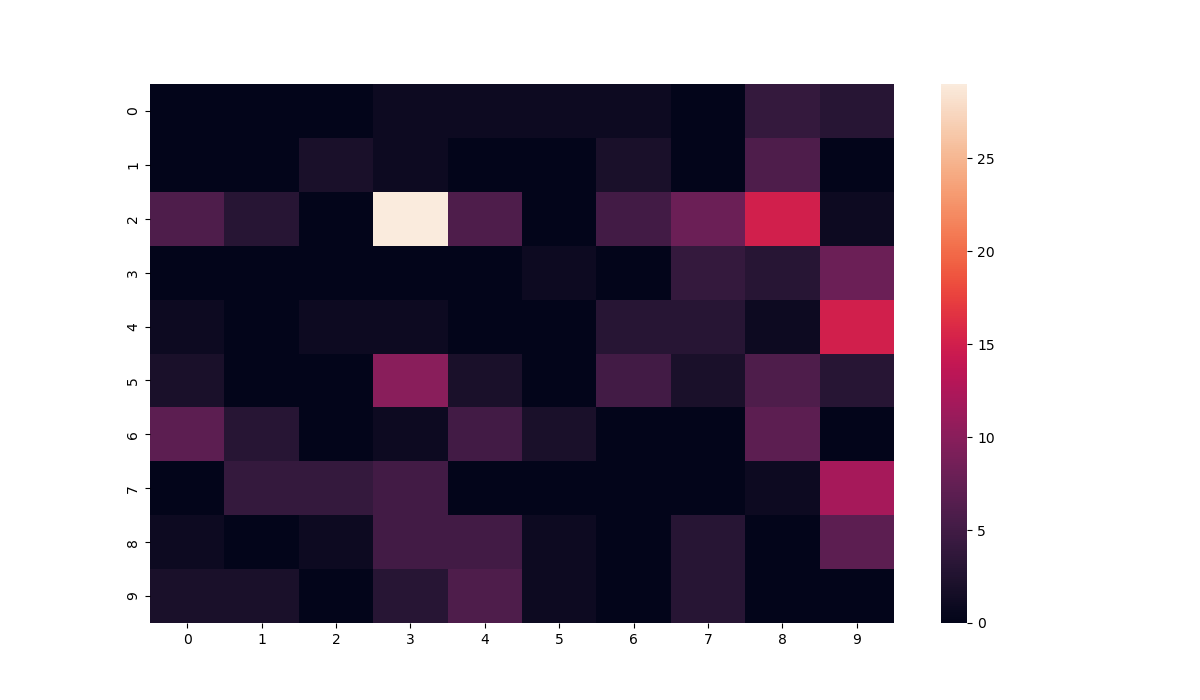

('smallerModel', '2023-03-16 19:14:29', '97.67')


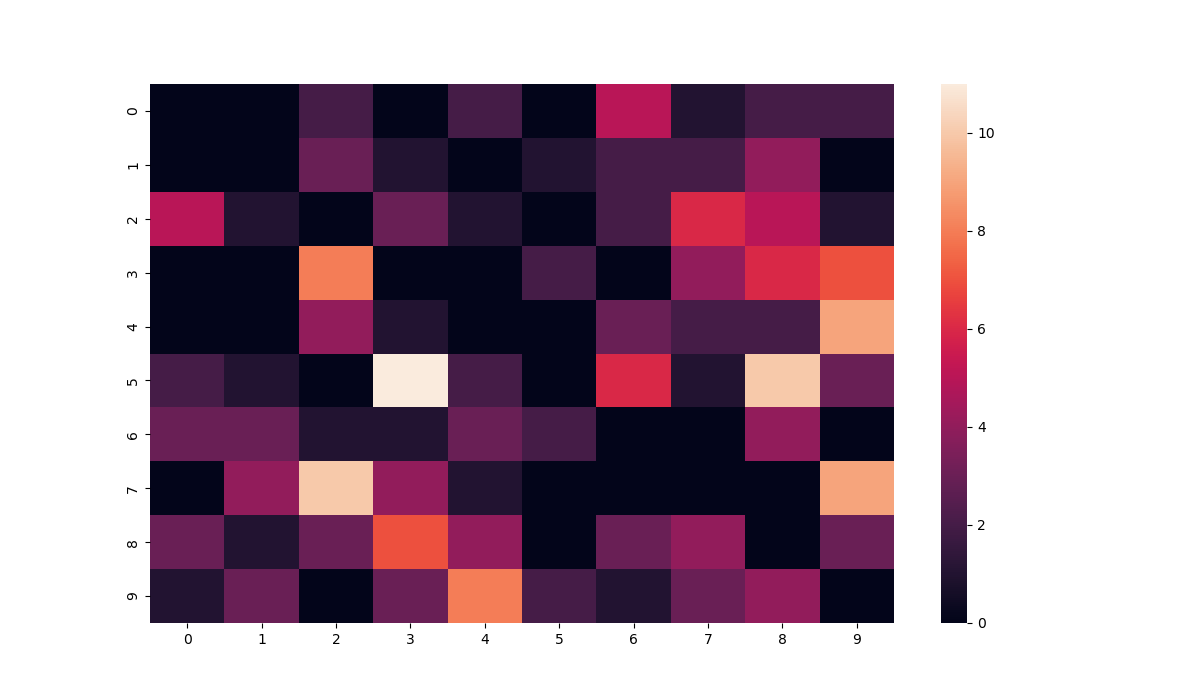

('smallerModel', '2023-03-16 19:15:07', '96.9')


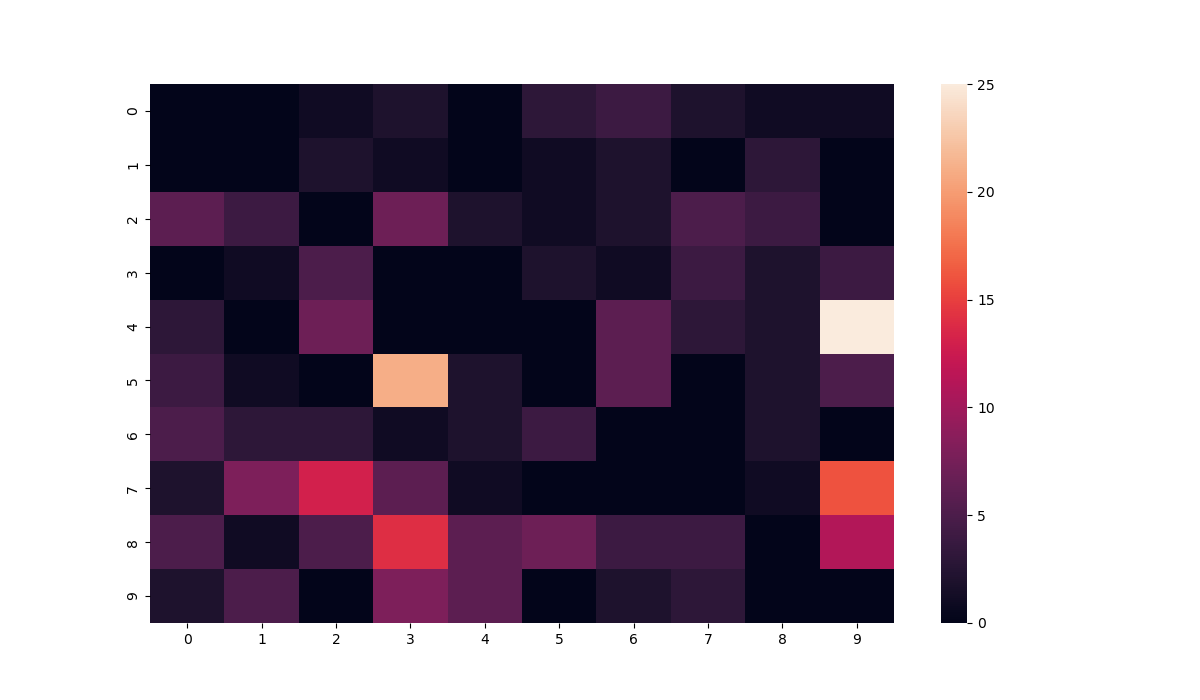

('increaseLR', '2023-03-16 19:16:23', '96.53')


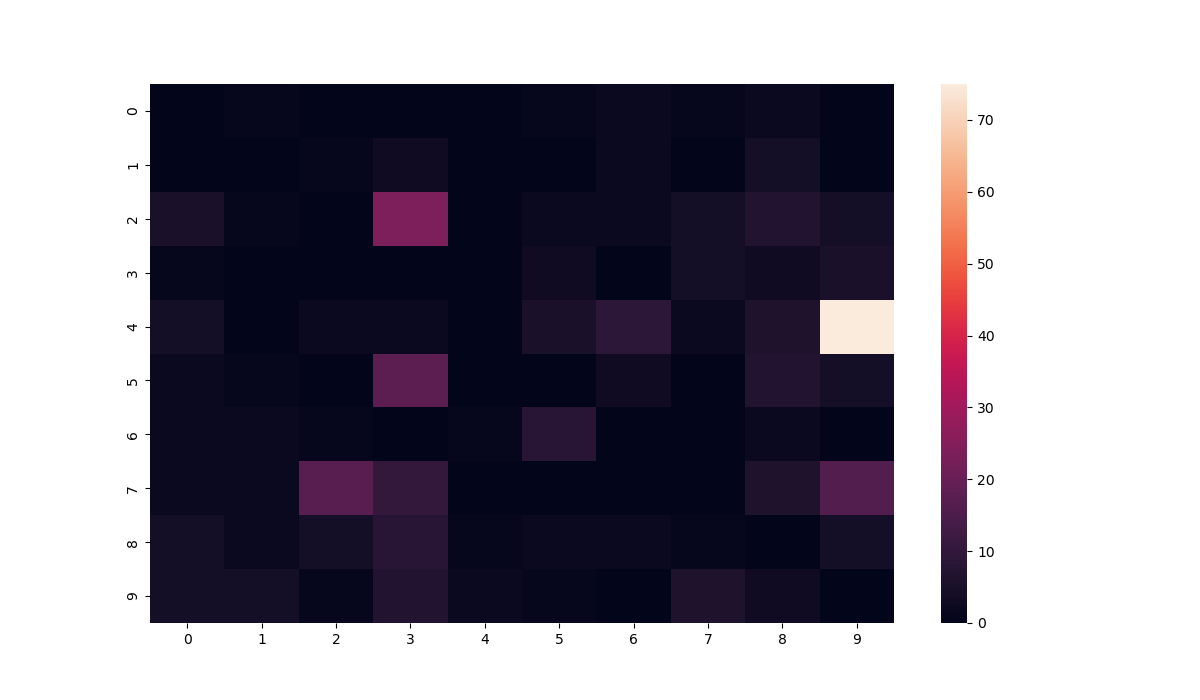

('smallerBatchSize', '2023-03-16 19:17:16', '96.48')


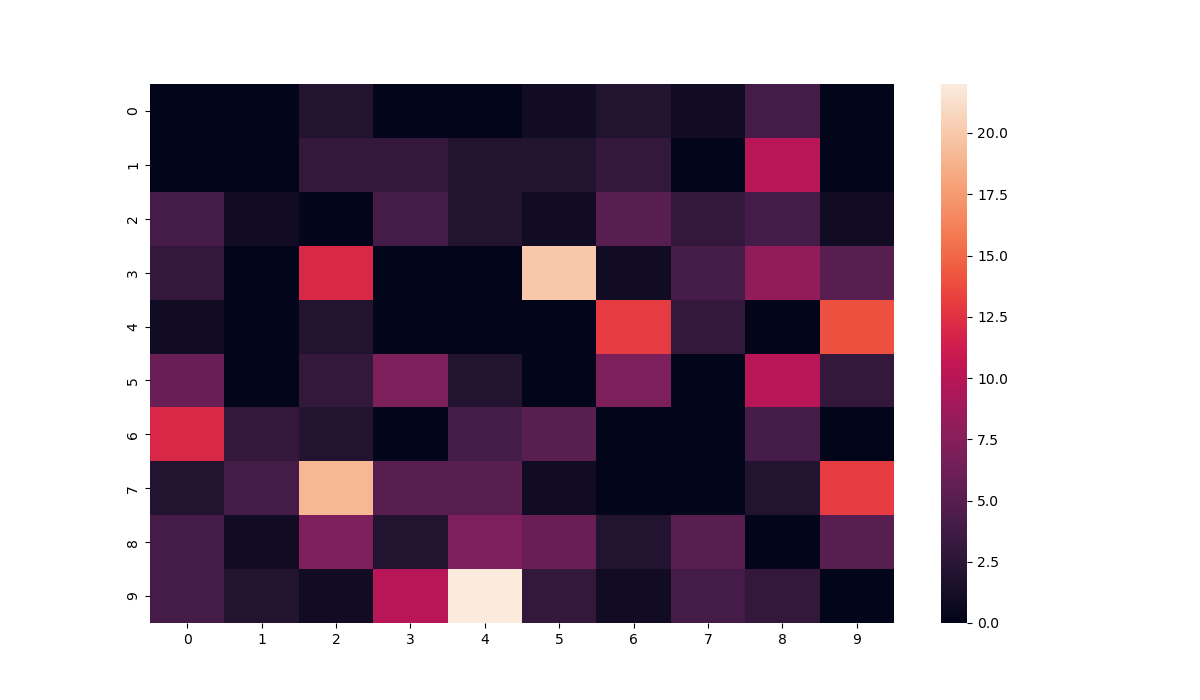

('confusionMatrix', '2023-03-22 20:25:34', '97.05')


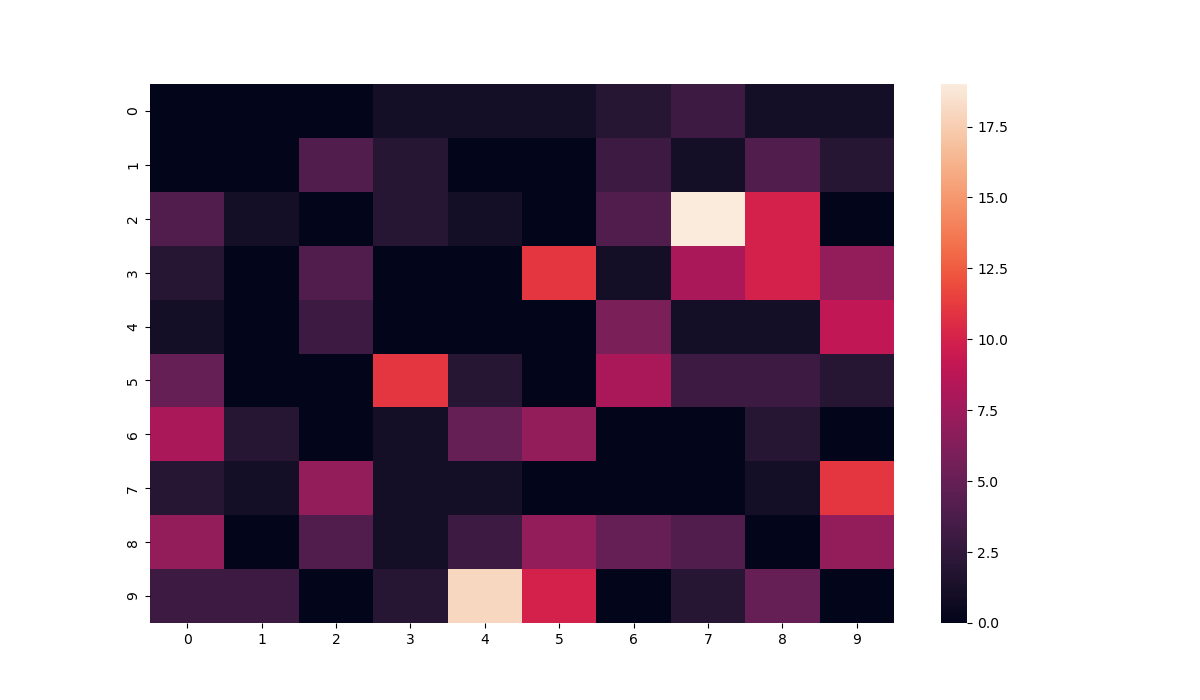

In [10]:
from IPython.display import display
from IPython.core.display import Image
from pathlib import PurePath

for projid,runid,tstamp,vid,cf_matrix,accuracy in pvt[list(flor.DATA_PREP) + ['cf_matrix', 'accuracy']].drop_duplicates().values:
  if not isinstance(cf_matrix, float):
    p = PurePath(cf_matrix)
    print((runid, str(tstamp), accuracy))
    display(Image(p))

In [7]:
flor.replay(['cf_matrix'], 'cf_matrix.isna()', 'main.py')

,projid,runid,tstamp,vid,seconds
0,ml_tutorial_flor.shadow.slim,firstRun,2023-03-16 19:05:52,adef6a3ecb5b81729be132bffb1b77cafcbabbf0,1.592322
1,ml_tutorial_flor.shadow.slim,smallerModel,2023-03-16 19:14:29,fd588e17c39bac20dfd7612a3a6ddba8b8d32cb3,1.589842
2,ml_tutorial_flor.shadow.slim,smallerModel,2023-03-16 19:15:07,80b771bd0ae66538a6fa4d149a09ab34361d540b,1.585685
3,ml_tutorial_flor.shadow.slim,increaseLR,2023-03-16 19:16:23,e273531a28bb6f16fa24b54056e23e7c1b9cdc9d,1.577927
4,ml_tutorial_flor.shadow.slim,smallerBatchSize,2023-03-16 19:17:16,ae0355650b4c358baa113c1c75821c778091ee9e,1.582226


Continue replaying 5 versions at DATA_PREP level for 22.93 seconds?
Accuracy of the network on the 10000 test images: 97.43 %
Flor wrote log records to SqliteDB
Accuracy of the network on the 10000 test images: 97.67 %
Flor wrote log records to SqliteDB
Accuracy of the network on the 10000 test images: 96.9 %
Flor wrote log records to SqliteDB
Accuracy of the network on the 10000 test images: 96.53 %
Flor wrote log records to SqliteDB
Accuracy of the network on the 10000 test images: 96.48 %
Flor wrote log records to SqliteDB
Time elapsed: 26.441039323806763 seconds
